<a href="https://colab.research.google.com/github/anaperez10/AnaliticaIII-Salud/blob/main/Copia3_Base_concatenada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**EJERCICIO PRÁCTICO - ANALÍTICA EN SALUD: CANTIDAD DE CIRUGÍAS**

Generacion de base de datos post pandemia a trabajar (2021-2022)

In [1]:
#Conexión con colab
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from unicodedata import normalize
from sklearn.model_selection import RandomizedSearchCV

Mounted at /content/drive


In [2]:
# Leer cada una de las bases de datos.
cx = pd.read_csv('/content/drive/MyDrive/Curso Analitica 3/cxpost.csv')
cronicos = pd.read_csv('/content/drive/MyDrive/Curso Analitica 3/cronicospost.csv')
usuarios = pd.read_csv('/content/drive/MyDrive/Curso Analitica 3/usuariospost.csv')
cx.head(5)

,Unnamed: 0,YEAR,MES,CODIGO SERVICIO HABILITACION,SERVICIO HABILITACION,TIPO IDENTIFICACION,NRODOC,FECHA NACIMIENTO,REGIMEN,CODIGO EPS,...,COD DIAGNOSTICO POSTQUIRURGICO,DIAGNOSTICO POSTQUIRURGICO,TIPO DE HERIDA,TIPO AISLAMIENTO,COMPLICACIONES,CATEGORIA COMPLICACION,ESPECIALIDAD,SEDE,IDCX,ADMISION
0,854,2021,ENERO,207.0,cirugia ortopedica,CC,308384,1971-02-10,subsidiado,1415.0,...,T818,OTRAS COMPLICACIONES DE PROCEDIMIENTOS NO CLAS...,contaminada,NaN,False,3.0,ortopedia,LEON XIII,109718.0,5466001
1,855,2021,ENERO,215.0,cirugia urologica,CC,308384,1971-02-10,subsidiado,1415.0,...,N359,ESTRECHEZ URETRAL NO ESPECIFICADA,limpia contaminada,Protector;,False,2.0,urologia,LEON XIII,109856.0,5466001
2,856,2021,ENERO,207.0,cirugia ortopedica,CC,308384,1971-02-10,subsidiado,1415.0,...,M869,OSTEOMIELITIS NO ESPECIFICADA,contaminada,Protector;,False,3.0,ortopedia,LEON XIII,110056.0,5466001
3,857,2021,ENERO,207.0,cirugia ortopedica,CC,308384,1971-02-10,subsidiado,1415.0,...,M866,OTRAS OSTEOMIELITIS CRONICAS,sucia,Protector;,False,2.0,ortopedia,LEON XIII,110349.0,5466001
4,858,2021,ENERO,207.0,cirugia ortopedica,CC,308384,1971-02-10,subsidiado,1415.0,...,M864,OSTEOMIELITIS CRONICA CON DRENAJE DEL SENO,contaminada,Protector;,False,2.0,ortopedia,LEON XIII,110480.0,5466001


In [3]:
cx.head(5)

,Unnamed: 0,YEAR,MES,CODIGO SERVICIO HABILITACION,SERVICIO HABILITACION,TIPO IDENTIFICACION,NRODOC,FECHA NACIMIENTO,REGIMEN,CODIGO EPS,...,COD DIAGNOSTICO POSTQUIRURGICO,DIAGNOSTICO POSTQUIRURGICO,TIPO DE HERIDA,TIPO AISLAMIENTO,COMPLICACIONES,CATEGORIA COMPLICACION,ESPECIALIDAD,SEDE,IDCX,ADMISION
0,854,2021,ENERO,207.0,cirugia ortopedica,CC,308384,1971-02-10,subsidiado,1415.0,...,T818,OTRAS COMPLICACIONES DE PROCEDIMIENTOS NO CLAS...,contaminada,NaN,False,3.0,ortopedia,LEON XIII,109718.0,5466001
1,855,2021,ENERO,215.0,cirugia urologica,CC,308384,1971-02-10,subsidiado,1415.0,...,N359,ESTRECHEZ URETRAL NO ESPECIFICADA,limpia contaminada,Protector;,False,2.0,urologia,LEON XIII,109856.0,5466001
2,856,2021,ENERO,207.0,cirugia ortopedica,CC,308384,1971-02-10,subsidiado,1415.0,...,M869,OSTEOMIELITIS NO ESPECIFICADA,contaminada,Protector;,False,3.0,ortopedia,LEON XIII,110056.0,5466001
3,857,2021,ENERO,207.0,cirugia ortopedica,CC,308384,1971-02-10,subsidiado,1415.0,...,M866,OTRAS OSTEOMIELITIS CRONICAS,sucia,Protector;,False,2.0,ortopedia,LEON XIII,110349.0,5466001
4,858,2021,ENERO,207.0,cirugia ortopedica,CC,308384,1971-02-10,subsidiado,1415.0,...,M864,OSTEOMIELITIS CRONICA CON DRENAJE DEL SENO,contaminada,Protector;,False,2.0,ortopedia,LEON XIII,110480.0,5466001


Se hace de nuevo una depuracion de la base de datos de cirugia, en donde los elementos post cirugia se eliminan.


In [4]:
cx.columns.values

array(['Unnamed: 0', 'YEAR', 'MES', 'CODIGO SERVICIO HABILITACION',
       'SERVICIO HABILITACION', 'TIPO IDENTIFICACION', 'NRODOC',
       'FECHA NACIMIENTO', 'REGIMEN', 'CODIGO EPS',
       'DESCRIPCION EPS VALIDADA', 'FECHA ORDEN', 'ORIGEN ORDEN',
       'ORIGEN ADMSION', 'QUIROFANO', 'TIPO PROCEDIMIENTO',
       'FECHA PREANESTESIA', 'ASA', 'FECHA CIRUGIA', 'TIPO DE ANESTESIA',
       'FECHA RECUPERACION CX', 'VIA', 'COD CUPS',
       'NOMBRE DE PROCEDIMIENTO', 'PROCEDIMIENTO 0256',
       'COD DIAGNOSTICO PREQUIRURGICO', 'DESCRIPCION PREQUIRURGICO',
       'CIE 10 TERCER CARACTER', 'DESCRIPCION TERCER CARACTER',
       'CAPITULO CIE10', 'NOMBRE CAPITULO',
       'COD DIAGNOSTICO POSTQUIRURGICO', 'DIAGNOSTICO POSTQUIRURGICO',
       'TIPO DE HERIDA', 'TIPO AISLAMIENTO', 'COMPLICACIONES',
       'CATEGORIA COMPLICACION', 'ESPECIALIDAD', 'SEDE', 'IDCX',
       'ADMISION'], dtype=object)

In [5]:
cronicos.head(5)

,Unnamed: 0,YEAR,MES,Fecha diligenciamiento,Hora,Atención,Ingreso,Tipo,NRODOC,Peso,...,VO2 - Máxima Cantidad de Oxígeno,Índice de Fragilidad Groningen,Calificación (Índice de Fragilidad),Tiempo en Segundos (Apoyo Monopodal),Calificación (Apoyo Monopodal),Tiempo en Segundos (Recorrer 5 metros),Velocidad (m/s),Calificación Velocidad,Requiere cita de morbilidad,Ambito según el médico
0,12827,2021,ENERO,2021-01-01,12:13:45 a.m.,5465666,3668418,CC,310176,56.0,...,13.8855,9.0,Frágil,9,Malo - Fragil,6,0.83,Deficiente,Si,Domiciliario
1,12828,2021,ENERO,2021-01-01,8:01:46 p.m.,5459773,3670506,CC,312214,39.0,...,35.3671,8.0,Frágil,10,Aceptable,6,0.83,Deficiente,Si,Domiciliario
2,12829,2021,ENERO,2021-01-03,8:41:16 p.m.,5456426,3670496,CC,311627,88.0,...,12.5212,9.0,Frágil,0,Malo - Fragil,0,0.00,Malo - Frágil,No,Domiciliario
3,12831,2021,ENERO,2021-01-04,8:33:34 a.m.,4306788,3669378,CC,307827,65.2,...,17.2497,10.0,Frágil,0,Malo - Fragil,9,0.56,Malo - Frágil,Si,Domiciliario
4,12833,2021,ENERO,2021-01-04,8:40:58 a.m.,5325410,3670145,CC,312431,55.0,...,13.0032,4.0,Normal,6,Malo - Fragil,8,0.63,Deficiente,No,Domiciliario


In [6]:
cronicos.columns.values

array(['Unnamed: 0', 'YEAR', 'MES', 'Fecha diligenciamiento', 'Hora',
       'Atención', 'Ingreso', 'Tipo', 'NRODOC', 'Peso', 'Talla', 'IMC',
       'Clasificación IMC', 'Saturación de Oxígeno (%)',
       'Perímetro Muslo', 'Perímetro Cintura', 'Pliegue Triceps',
       'Pliegue Abdomen', 'Pliegue Muslo', 'Sumatoria Pliegues',
       'Presión Arterial Sistólica', 'Presión Arterial Diastólica',
       'Frecuencia Cardíaca en reposo',
       'Auto-calificacion Nivel de Ejercicio', 'Constantes',
       'METS -Índice Metabólico', 'VO2 - Máxima Cantidad de Oxígeno',
       'Índice de Fragilidad Groningen',
       'Calificación (Índice de Fragilidad)',
       'Tiempo en Segundos (Apoyo Monopodal)',
       'Calificación (Apoyo Monopodal)',
       'Tiempo en Segundos (Recorrer 5 metros)', 'Velocidad (m/s)',
       'Calificación Velocidad', 'Requiere cita de morbilidad',
       'Ambito según el médico'], dtype=object)

Tratamiento para CRONICOS


In [7]:
cronicos.columns= cronicos.columns.str.lower()
cx.columns= cx.columns.str.lower()

In [8]:
usuarios

,Unnamed: 0,mes,año,nrodoc,sexo,edad,municipio,ciclo_vital,quinquenio
0,101490,enero,2021,311028,m,69,sabaneta,vejez,65-69
1,101491,enero,2021,310961,m,75,bello,vejez,75-79
2,101492,enero,2021,311235,f,85,medellin,vejez,85-89
3,101493,enero,2021,307090,f,88,medellin,vejez,85-89
4,101494,enero,2021,310309,f,79,medellin,vejez,75-79
...,...,...,...,...,...,...,...,...,...
82416,183906,junio,2022,307482,f,81,medellin,vejez,80-84
82417,183907,junio,2022,313801,f,23,sin información,juventud,20-24
82418,183908,junio,2022,307738,f,78,medellin,vejez,75-79
82419,183909,junio,2022,311656,m,82,medellin,vejez,80-84


In [9]:
cronicos.head()

,unnamed: 0,year,mes,fecha diligenciamiento,hora,atención,ingreso,tipo,nrodoc,peso,...,vo2 - máxima cantidad de oxígeno,índice de fragilidad groningen,calificación (índice de fragilidad),tiempo en segundos (apoyo monopodal),calificación (apoyo monopodal),tiempo en segundos (recorrer 5 metros),velocidad (m/s),calificación velocidad,requiere cita de morbilidad,ambito según el médico
0,12827,2021,ENERO,2021-01-01,12:13:45 a.m.,5465666,3668418,CC,310176,56.0,...,13.8855,9.0,Frágil,9,Malo - Fragil,6,0.83,Deficiente,Si,Domiciliario
1,12828,2021,ENERO,2021-01-01,8:01:46 p.m.,5459773,3670506,CC,312214,39.0,...,35.3671,8.0,Frágil,10,Aceptable,6,0.83,Deficiente,Si,Domiciliario
2,12829,2021,ENERO,2021-01-03,8:41:16 p.m.,5456426,3670496,CC,311627,88.0,...,12.5212,9.0,Frágil,0,Malo - Fragil,0,0.00,Malo - Frágil,No,Domiciliario
3,12831,2021,ENERO,2021-01-04,8:33:34 a.m.,4306788,3669378,CC,307827,65.2,...,17.2497,10.0,Frágil,0,Malo - Fragil,9,0.56,Malo - Frágil,Si,Domiciliario
4,12833,2021,ENERO,2021-01-04,8:40:58 a.m.,5325410,3670145,CC,312431,55.0,...,13.0032,4.0,Normal,6,Malo - Fragil,8,0.63,Deficiente,No,Domiciliario


In [10]:
cronicos1 = cronicos.groupby(['nrodoc'])[['unnamed: 0']].count().reset_index()
cronicos1.rename(columns = {'unnamed: 0':'cantidad de registros en cronicos'},inplace=True)
cronicos1

,nrodoc,cantidad de registros en cronicos
0,306221,3
1,306222,3
2,306223,1
3,306225,3
4,306230,4
...,...,...
5012,314216,1
5013,314217,2
5014,314218,1
5015,314219,4


In [11]:
cronicos2 = pd.merge(cronicos1,cronicos, on = 'nrodoc',how = 'inner')
cronicos2

,nrodoc,cantidad de registros en cronicos,unnamed: 0,year,mes,fecha diligenciamiento,hora,atención,ingreso,tipo,...,vo2 - máxima cantidad de oxígeno,índice de fragilidad groningen,calificación (índice de fragilidad),tiempo en segundos (apoyo monopodal),calificación (apoyo monopodal),tiempo en segundos (recorrer 5 metros),velocidad (m/s),calificación velocidad,requiere cita de morbilidad,ambito según el médico
0,306221,3,23612,2021,SEPTIEMBRE,2021-09-14,10:57:03 a.m.,5782373,4021570,CC,...,5.6854,6.0,Frágil,0,Malo - Fragil,9,0.56,Malo - Frágil,No,Ambulatorio
1,306221,3,28919,2021,DICIEMBRE,2021-12-20,10:47:00 a.m.,5902300,4155406,CC,...,5.3935,4.0,Normal,0,Malo - Fragil,9,0.56,Malo - Frágil,No,Ambulatorio
2,306221,3,34630,2022,MARZO,2022-03-23,8:53:44 a.m.,6009224,4267035,CC,...,6.0060,2.0,Normal,0,Malo - Fragil,4,1.25,Aceptable,No,Ambulatorio
3,306222,3,20495,2021,JULIO,2021-07-23,11:59:12 a.m.,5716669,3952526,CC,...,23.8318,3.0,Normal,0,Malo - Fragil,0,0.00,Malo - Frágil,No,Ambulatorio
4,306222,3,24778,2021,OCTUBRE,2021-10-08,1:51:01 p.m.,5814923,4055969,CC,...,22.3044,1.0,Normal,0,Malo - Fragil,5,1.00,Aceptable,No,Ambulatorio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25284,314219,4,35092,2022,MARZO,2022-03-31,8:12:14 a.m.,6031834,4278122,CC,...,15.2261,9.0,Frágil,0,Malo - Fragil,5,1.00,Aceptable,No,Ambulatorio
25285,314219,4,35447,2022,ABRIL,2022-04-06,7:33:13 a.m.,6048896,4286525,CC,...,15.4745,5.0,Frágil,0,Malo - Fragil,8,0.63,Deficiente,No,Domiciliario
25286,314219,4,35448,2022,ABRIL,2022-04-18,11:58:27 a.m.,6048896,4286525,CC,...,15.4745,5.0,Frágil,0,Malo - Fragil,8,0.63,Deficiente,Si,Domiciliario
25287,314219,4,38462,2022,MAYO,2022-05-24,5:51:12 p.m.,6048896,4286525,CC,...,14.8445,5.0,Frágil,0,Malo - Fragil,8,0.63,Deficiente,No,Domiciliario


In [12]:
cronicos2=cronicos2.drop_duplicates(subset=['nrodoc'])
cronicos2.shape

(5017, 37)

In [13]:
cronicos2 = cronicos2.drop(['tipo','clasificación imc','calificación (índice de fragilidad)','calificación (apoyo monopodal)','calificación velocidad','unnamed: 0'], axis=1)
cronicos2

,nrodoc,cantidad de registros en cronicos,year,mes,fecha diligenciamiento,hora,atención,ingreso,peso,talla,...,auto-calificacion nivel de ejercicio,constantes,mets -índice metabólico,vo2 - máxima cantidad de oxígeno,índice de fragilidad groningen,tiempo en segundos (apoyo monopodal),tiempo en segundos (recorrer 5 metros),velocidad (m/s),requiere cita de morbilidad,ambito según el médico
0,306221,3,2021,SEPTIEMBRE,2021-09-14,10:57:03 a.m.,5782373,4021570,75.0,143.0,...,1,0.0,1.6244,5.6854,6.0,0,9,0.56,No,Ambulatorio
3,306222,3,2021,JULIO,2021-07-23,11:59:12 a.m.,5716669,3952526,72.0,164.0,...,1,0.0,6.8091,23.8318,3.0,0,0,0.00,No,Ambulatorio
6,306223,1,2021,ENERO,2021-01-28,7:28:15 a.m.,5240438,3669950,72.0,162.0,...,1,0.0,2.7069,9.4741,15.0,0,0,0.00,Si,Domiciliario
7,306225,3,2021,SEPTIEMBRE,2021-09-17,10:14:25 a.m.,5793621,4026277,56.0,150.0,...,1,0.0,7.0087,24.5304,6.0,3,3,1.67,No,Ambulatorio
10,306230,4,2021,MARZO,2021-03-03,9:00:45 a.m.,5540086,3752542,72.0,162.0,...,1,0.0,3.7469,13.1141,5.0,0,9,0.56,No,Ambulatorio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25280,314216,1,2022,MARZO,2022-03-17,6:47:49 a.m.,6013543,4260764,91.0,134.0,...,1,0.0,4.0344,14.1204,1.0,2,5,1.00,No,Ambulatorio
25281,314217,2,2022,FEBRERO,2022-02-07,8:02:14 a.m.,5975763,4210294,56.0,150.0,...,1,0.0,4.1187,14.4155,8.0,6,6,0.83,No,Ambulatorio
25283,314218,1,2022,MARZO,2022-03-04,8:21:00 a.m.,5990784,4244375,102.0,172.0,...,1,0.0,6.4584,22.6044,4.0,10,5,1.00,No,Ambulatorio
25284,314219,4,2022,MARZO,2022-03-31,8:12:14 a.m.,6031834,4278122,71.0,148.0,...,1,0.0,4.3503,15.2261,9.0,0,5,1.00,No,Ambulatorio


Tratamiento para USUARIOS

In [14]:
usuarios1 = cronicos.groupby(['nrodoc'])[['unnamed: 0']].count().reset_index()
usuarios1.rename(columns = {'unnamed: 0':'cantidad de registros en el sistema'},inplace=True)
usuarios1

,nrodoc,cantidad de registros en el sistema
0,306221,3
1,306222,3
2,306223,1
3,306225,3
4,306230,4
...,...,...
5012,314216,1
5013,314217,2
5014,314218,1
5015,314219,4


In [15]:
usuarios2 = pd.merge(usuarios1,usuarios, on = 'nrodoc',how = 'inner')
usuarios2

,nrodoc,cantidad de registros en el sistema,Unnamed: 0,mes,año,sexo,edad,municipio,ciclo_vital,quinquenio
0,306221,3,103403,enero,2021,f,82,medellin,vejez,80-84
1,306221,3,108198,febrero,2021,f,82,medellin,vejez,80-84
2,306221,3,112932,marzo,2021,f,82,medellin,vejez,80-84
3,306221,3,117540,abril,2021,f,82,medellin,vejez,80-84
4,306221,3,122067,mayo,2021,f,82,medellin,vejez,80-84
...,...,...,...,...,...,...,...,...,...,...
80280,314219,4,183799,junio,2022,m,63,medellin,vejez,60-64
80281,314220,1,170479,marzo,2022,m,69,medellin,vejez,65-69
80282,314220,1,174973,abril,2022,m,69,medellin,vejez,65-69
80283,314220,1,179407,mayo,2022,m,69,medellin,vejez,65-69


In [16]:
usuarios2 = usuarios2.drop(['ciclo_vital','quinquenio','Unnamed: 0'],axis=1)

Tratamiento a CIRUGIAS

In [17]:
cx

,unnamed: 0,year,mes,codigo servicio habilitacion,servicio habilitacion,tipo identificacion,nrodoc,fecha nacimiento,regimen,codigo eps,...,cod diagnostico postquirurgico,diagnostico postquirurgico,tipo de herida,tipo aislamiento,complicaciones,categoria complicacion,especialidad,sede,idcx,admision
0,854,2021,ENERO,207.0,cirugia ortopedica,CC,308384,1971-02-10,subsidiado,1415.0,...,T818,OTRAS COMPLICACIONES DE PROCEDIMIENTOS NO CLAS...,contaminada,NaN,False,3.0,ortopedia,LEON XIII,109718.0,5466001
1,855,2021,ENERO,215.0,cirugia urologica,CC,308384,1971-02-10,subsidiado,1415.0,...,N359,ESTRECHEZ URETRAL NO ESPECIFICADA,limpia contaminada,Protector;,False,2.0,urologia,LEON XIII,109856.0,5466001
2,856,2021,ENERO,207.0,cirugia ortopedica,CC,308384,1971-02-10,subsidiado,1415.0,...,M869,OSTEOMIELITIS NO ESPECIFICADA,contaminada,Protector;,False,3.0,ortopedia,LEON XIII,110056.0,5466001
3,857,2021,ENERO,207.0,cirugia ortopedica,CC,308384,1971-02-10,subsidiado,1415.0,...,M866,OTRAS OSTEOMIELITIS CRONICAS,sucia,Protector;,False,2.0,ortopedia,LEON XIII,110349.0,5466001
4,858,2021,ENERO,207.0,cirugia ortopedica,CC,308384,1971-02-10,subsidiado,1415.0,...,M864,OSTEOMIELITIS CRONICA CON DRENAJE DEL SENO,contaminada,Protector;,False,2.0,ortopedia,LEON XIII,110480.0,5466001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,2365,2022,MAYO,207.0,cirugia ortopedica,CC,312770,1950-05-07,contributivo,1791.0,...,G560,SINDROME DEL TUNEL CARPIANO,limpia,NaN,False,3.0,ortopedia,PRADO,132416.0,6121284
1083,2366,2022,MAYO,207.0,cirugia ortopedica,CC,313334,1947-03-28,contributivo,1791.0,...,G560,SINDROME DEL TUNEL CARPIANO,limpia,NaN,False,3.0,ortopedia,PRADO,132427.0,6121928
1084,2367,2022,JUNIO,213.0,cirugia plastica y estetica,CC,307306,1936-10-15,contributivo,3289.0,...,C443,TUMOR MALIGNO DE LA PIEL DE OTRAS PARTES Y DE ...,limpia,NaN,False,2.0,cirugia plastica,PRADO,132700.0,6129844
1085,2368,2022,JUNIO,203.0,cirugia general,CC,307270,1956-12-22,contributivo,1791.0,...,K439,OTRAS HERNIAS VENTRALES Y LAS NO ESPECIFICADAS...,limpia,NaN,False,2.0,cirugia general,PRADO,132904.0,6136389


In [18]:
cx.columns

Index(['unnamed: 0', 'year', 'mes', 'codigo servicio habilitacion',
       'servicio habilitacion', 'tipo identificacion', 'nrodoc',
       'fecha nacimiento', 'regimen', 'codigo eps', 'descripcion eps validada',
       'fecha orden', 'origen orden', 'origen admsion', 'quirofano',
       'tipo procedimiento', 'fecha preanestesia', 'asa', 'fecha cirugia',
       'tipo de anestesia', 'fecha recuperacion cx', 'via', 'cod cups',
       'nombre de procedimiento', 'procedimiento 0256',
       'cod diagnostico prequirurgico', 'descripcion prequirurgico',
       'cie 10 tercer caracter', 'descripcion tercer caracter',
       'capitulo cie10', 'nombre capitulo', 'cod diagnostico postquirurgico',
       'diagnostico postquirurgico', 'tipo de herida', 'tipo aislamiento',
       'complicaciones', 'categoria complicacion', 'especialidad', 'sede',
       'idcx', 'admision'],
      dtype='object')

In [19]:
cx.columns= cx.columns.str.lower()

In [20]:
#Aplicar funciones para homologar a nivel general.
lista = ['mes','sede']
for i in lista:
    cx[i] = cx[i].str.lower() #minuscula
    cx[i] = cx[i].str.strip() #espacios
    cx[i] = cx[i].apply(lambda x: normalize("NFKD", x).encode("ascii", "ignore").decode("ascii") if pd.notnull(x) else x)

In [21]:
cx1 = cx.groupby(['nrodoc'])[['unnamed: 0']].count().reset_index()
cx1.rename(columns = {'unnamed: 0':'cantidad de cirugias'},inplace=True)
cx1

,nrodoc,cantidad de cirugias
0,306221,1
1,306230,3
2,306233,1
3,306259,1
4,306271,1
...,...,...
723,314120,1
724,314125,1
725,314172,1
726,314182,1


In [22]:
# verificar cantidad de cirugias con registro único en cx
cx[(cx['nrodoc'] == 306221)]

,unnamed: 0,year,mes,codigo servicio habilitacion,servicio habilitacion,tipo identificacion,nrodoc,fecha nacimiento,regimen,codigo eps,...,cod diagnostico postquirurgico,diagnostico postquirurgico,tipo de herida,tipo aislamiento,complicaciones,categoria complicacion,especialidad,sede,idcx,admision
678,1532,2022,enero,217.0,otras cirugias,CC,306221,1938-09-09,contributivo,1415.0,...,M170,GONARTROSIS PRIMARIA BILATERAL,limpia,NaN,False,3.0,medicina del dolor y cuidado paliativo,leon xiii,126470.0,5919903


In [23]:
# verificar cantidad de cirugias con registro único en cx
cronicos[(cronicos['nrodoc'] == 306221)]

,unnamed: 0,year,mes,fecha diligenciamiento,hora,atención,ingreso,tipo,nrodoc,peso,...,vo2 - máxima cantidad de oxígeno,índice de fragilidad groningen,calificación (índice de fragilidad),tiempo en segundos (apoyo monopodal),calificación (apoyo monopodal),tiempo en segundos (recorrer 5 metros),velocidad (m/s),calificación velocidad,requiere cita de morbilidad,ambito según el médico
10393,23612,2021,SEPTIEMBRE,2021-09-14,10:57:03 a.m.,5782373,4021570,CC,306221,75.0,...,5.6854,6.0,Frágil,0,Malo - Fragil,9,0.56,Malo - Frágil,No,Ambulatorio
15573,28919,2021,DICIEMBRE,2021-12-20,10:47:00 a.m.,5902300,4155406,CC,306221,73.0,...,5.3935,4.0,Normal,0,Malo - Fragil,9,0.56,Malo - Frágil,No,Ambulatorio
21216,34630,2022,MARZO,2022-03-23,8:53:44 a.m.,6009224,4267035,CC,306221,74.0,...,6.0060,2.0,Normal,0,Malo - Fragil,4,1.25,Aceptable,No,Ambulatorio


In [24]:
dfcx = pd.merge(cx1,cx, on = 'nrodoc',how = 'inner')
dfcx

,nrodoc,cantidad de cirugias,unnamed: 0,year,mes,codigo servicio habilitacion,servicio habilitacion,tipo identificacion,fecha nacimiento,regimen,...,cod diagnostico postquirurgico,diagnostico postquirurgico,tipo de herida,tipo aislamiento,complicaciones,categoria complicacion,especialidad,sede,idcx,admision
0,306221,1,1532,2022,enero,217.0,otras cirugias,CC,1938-09-09,contributivo,...,M170,GONARTROSIS PRIMARIA BILATERAL,limpia,NaN,False,3.0,medicina del dolor y cuidado paliativo,leon xiii,126470.0,5919903
1,306230,3,1486,2021,diciembre,203.0,cirugia general,CC,1940-01-25,subsidiado,...,K810,COLECISTITIS AGUDA,sucia,NaN,False,3.0,otras cirugias,leon xiii,125132.0,5929611
2,306230,3,1487,2021,diciembre,203.0,cirugia general,CC,1940-01-25,subsidiado,...,K810,COLECISTITIS AGUDA,contaminada,NaN,False,3.0,cirugia general,leon xiii,125132.0,5929611
3,306230,3,1495,2022,enero,245.0,neurocirugia,CC,1940-01-25,contributivo,...,G919,HIDROCEFALO NO ESPECIFICADO,contaminada,NaN,False,3.0,neurocirugia,leon xiii,125361.0,5929611
4,306233,1,1801,2022,mayo,207.0,cirugia ortopedica,CC,1942-07-22,contributivo,...,S721,FRACTURA PERTROCANTERIANA,limpia,NaN,False,3.0,ortopedia,leon xiii,132024.0,6105562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,314120,1,1593,2022,febrero,207.0,cirugia ortopedica,CC,1962-04-22,contributivo,...,S525,FRACTURA DE LA EPIFISIS INFERIOR DEL RADIO,limpia,NaN,False,3.0,ortopedia,leon xiii,127707.0,5992455
1083,314125,1,1803,2022,mayo,213.0,cirugia plastica y estetica,CC,1948-09-10,contributivo,...,C443,TUMOR MALIGNO DE LA PIEL DE OTRAS PARTES Y DE ...,limpia,NaN,False,2.0,cirugia plastica,leon xiii,132106.0,6080691
1084,314172,1,1685,2022,marzo,214.0,cirugia vascular y angiologica,CC,1938-01-01,contributivo,...,I702,ATEROSCLEROSIS DE LAS ARTERIAS DE LOS MIEMBROS,sucia,NaN,False,3.0,cirugia vascular,leon xiii,129503.0,6035935
1085,314182,1,1610,2022,marzo,207.0,cirugia ortopedica,CC,1926-12-05,contributivo,...,S721,FRACTURA PERTROCANTERIANA,limpia,NaN,False,3.0,ortopedia,leon xiii,128140.0,6003330


In [25]:
dfcx[(dfcx['nrodoc'] == 306230)]

,nrodoc,cantidad de cirugias,unnamed: 0,year,mes,codigo servicio habilitacion,servicio habilitacion,tipo identificacion,fecha nacimiento,regimen,...,cod diagnostico postquirurgico,diagnostico postquirurgico,tipo de herida,tipo aislamiento,complicaciones,categoria complicacion,especialidad,sede,idcx,admision
1,306230,3,1486,2021,diciembre,203.0,cirugia general,CC,1940-01-25,subsidiado,...,K810,COLECISTITIS AGUDA,sucia,NaN,False,3.0,otras cirugias,leon xiii,125132.0,5929611
2,306230,3,1487,2021,diciembre,203.0,cirugia general,CC,1940-01-25,subsidiado,...,K810,COLECISTITIS AGUDA,contaminada,NaN,False,3.0,cirugia general,leon xiii,125132.0,5929611
3,306230,3,1495,2022,enero,245.0,neurocirugia,CC,1940-01-25,contributivo,...,G919,HIDROCEFALO NO ESPECIFICADO,contaminada,NaN,False,3.0,neurocirugia,leon xiii,125361.0,5929611


In [26]:
dfcx=dfcx.drop_duplicates(subset=['nrodoc'])

In [27]:
dfcx = dfcx.drop(['unnamed: 0','servicio habilitacion','tipo identificacion','descripcion eps validada','asa','descripcion prequirurgico','nombre de procedimiento',
              'descripcion tercer caracter', 'nombre capitulo','diagnostico postquirurgico'], axis=1)

# eliminados: 'descripcion tercer caracter', 'nombre capitulo','diagnostico postquirurgico'
# no eliminados: cie 10 tercer caracter','capitulo cie10', 'cod diagnostico postquirurgico', 'tipo de herida', 'tipo aislamiento','complicaciones', 'categoria complicacion'
dfcx

,nrodoc,cantidad de cirugias,year,mes,codigo servicio habilitacion,fecha nacimiento,regimen,codigo eps,fecha orden,origen orden,...,capitulo cie10,cod diagnostico postquirurgico,tipo de herida,tipo aislamiento,complicaciones,categoria complicacion,especialidad,sede,idcx,admision
0,306221,1,2022,enero,217.0,1938-09-09,contributivo,1415.0,1938-09-09,ambulatorio,...,M00-M99,M170,limpia,NaN,False,3.0,medicina del dolor y cuidado paliativo,leon xiii,126470.0,5919903
1,306230,3,2021,diciembre,203.0,1940-01-25,subsidiado,1415.0,1940-01-25,ambulatorio,...,K00-K93,K810,sucia,NaN,False,3.0,otras cirugias,leon xiii,125132.0,5929611
4,306233,1,2022,mayo,207.0,1942-07-22,contributivo,2889.0,1942-07-22,ambulatorio,...,S00-T98,S721,limpia,NaN,False,3.0,ortopedia,leon xiii,132024.0,6105562
5,306259,1,2021,noviembre,207.0,1932-05-10,subsidiado,1415.0,1932-05-10,hospitalizacion,...,S00-T98,S721,limpia,NaN,False,3.0,ortopedia,leon xiii,123263.0,5881701
6,306271,1,2021,julio,202.0,1944-04-22,subsidiado,1415.0,1944-04-22,ambulatorio,...,I00-I99,I255,limpia,NaN,False,3.0,otras cirugias,leon xiii,117503.0,5724777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,314120,1,2022,febrero,207.0,1962-04-22,contributivo,1415.0,1962-04-22,ambulatorio,...,S00-T98,S525,limpia,NaN,False,3.0,ortopedia,leon xiii,127707.0,5992455
1083,314125,1,2022,mayo,213.0,1948-09-10,contributivo,2889.0,1948-09-10,ambulatorio,...,C00-D48,C443,limpia,NaN,False,2.0,cirugia plastica,leon xiii,132106.0,6080691
1084,314172,1,2022,marzo,214.0,1938-01-01,contributivo,1415.0,1938-01-01,hospitalizacion,...,I00-I99,I702,sucia,NaN,False,3.0,cirugia vascular,leon xiii,129503.0,6035935
1085,314182,1,2022,marzo,207.0,1926-12-05,contributivo,2889.0,1926-12-05,urgencias adultos,...,S00-T98,S721,limpia,NaN,False,3.0,ortopedia,leon xiii,128140.0,6003330


In [28]:
dfcx.shape

(728, 32)

In [29]:
dfcx.isnull().sum()

nrodoc                              0
cantidad de cirugias                0
year                                0
mes                                 0
codigo servicio habilitacion        6
fecha nacimiento                    0
regimen                             0
codigo eps                          0
fecha orden                         0
origen orden                        0
origen admsion                      0
quirofano                           0
tipo procedimiento                  0
fecha preanestesia                  0
fecha cirugia                       0
tipo de anestesia                 101
fecha recuperacion cx               0
via                                 0
cod cups                            0
procedimiento 0256                  0
cod diagnostico prequirurgico       0
cie 10 tercer caracter              0
capitulo cie10                      0
cod diagnostico postquirurgico      0
tipo de herida                      0
tipo aislamiento                  716
complicacion

In [30]:
dfcx2 = pd.merge(dfcx,usuarios2, on = 'nrodoc', how = 'inner')
dfcx2

,nrodoc,cantidad de cirugias,year,mes_x,codigo servicio habilitacion,fecha nacimiento,regimen,codigo eps,fecha orden,origen orden,...,especialidad,sede,idcx,admision,cantidad de registros en el sistema,mes_y,año,sexo,edad,municipio
0,306221,1,2022,enero,217.0,1938-09-09,contributivo,1415.0,1938-09-09,ambulatorio,...,medicina del dolor y cuidado paliativo,leon xiii,126470.0,5919903,3,enero,2021,f,82,medellin
1,306221,1,2022,enero,217.0,1938-09-09,contributivo,1415.0,1938-09-09,ambulatorio,...,medicina del dolor y cuidado paliativo,leon xiii,126470.0,5919903,3,febrero,2021,f,82,medellin
2,306221,1,2022,enero,217.0,1938-09-09,contributivo,1415.0,1938-09-09,ambulatorio,...,medicina del dolor y cuidado paliativo,leon xiii,126470.0,5919903,3,marzo,2021,f,82,medellin
3,306221,1,2022,enero,217.0,1938-09-09,contributivo,1415.0,1938-09-09,ambulatorio,...,medicina del dolor y cuidado paliativo,leon xiii,126470.0,5919903,3,abril,2021,f,82,medellin
4,306221,1,2022,enero,217.0,1938-09-09,contributivo,1415.0,1938-09-09,ambulatorio,...,medicina del dolor y cuidado paliativo,leon xiii,126470.0,5919903,3,mayo,2021,f,82,medellin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11779,314187,1,2022,febrero,214.0,1942-07-27,contributivo,2891.0,1942-07-27,ambulatorio,...,cirugia vascular,leon xiii,127105.0,5976438,3,febrero,2022,f,79,medellin
11780,314187,1,2022,febrero,214.0,1942-07-27,contributivo,2891.0,1942-07-27,ambulatorio,...,cirugia vascular,leon xiii,127105.0,5976438,3,marzo,2022,f,79,medellin
11781,314187,1,2022,febrero,214.0,1942-07-27,contributivo,2891.0,1942-07-27,ambulatorio,...,cirugia vascular,leon xiii,127105.0,5976438,3,abril,2022,f,79,medellin
11782,314187,1,2022,febrero,214.0,1942-07-27,contributivo,2891.0,1942-07-27,ambulatorio,...,cirugia vascular,leon xiii,127105.0,5976438,3,mayo,2022,f,79,medellin


In [31]:
dfcx2[(dfcx2['nrodoc'] == 306221)]

,nrodoc,cantidad de cirugias,year,mes_x,codigo servicio habilitacion,fecha nacimiento,regimen,codigo eps,fecha orden,origen orden,...,especialidad,sede,idcx,admision,cantidad de registros en el sistema,mes_y,año,sexo,edad,municipio
0,306221,1,2022,enero,217.0,1938-09-09,contributivo,1415.0,1938-09-09,ambulatorio,...,medicina del dolor y cuidado paliativo,leon xiii,126470.0,5919903,3,enero,2021,f,82,medellin
1,306221,1,2022,enero,217.0,1938-09-09,contributivo,1415.0,1938-09-09,ambulatorio,...,medicina del dolor y cuidado paliativo,leon xiii,126470.0,5919903,3,febrero,2021,f,82,medellin
2,306221,1,2022,enero,217.0,1938-09-09,contributivo,1415.0,1938-09-09,ambulatorio,...,medicina del dolor y cuidado paliativo,leon xiii,126470.0,5919903,3,marzo,2021,f,82,medellin
3,306221,1,2022,enero,217.0,1938-09-09,contributivo,1415.0,1938-09-09,ambulatorio,...,medicina del dolor y cuidado paliativo,leon xiii,126470.0,5919903,3,abril,2021,f,82,medellin
4,306221,1,2022,enero,217.0,1938-09-09,contributivo,1415.0,1938-09-09,ambulatorio,...,medicina del dolor y cuidado paliativo,leon xiii,126470.0,5919903,3,mayo,2021,f,82,medellin
5,306221,1,2022,enero,217.0,1938-09-09,contributivo,1415.0,1938-09-09,ambulatorio,...,medicina del dolor y cuidado paliativo,leon xiii,126470.0,5919903,3,junio,2021,f,82,medellin
6,306221,1,2022,enero,217.0,1938-09-09,contributivo,1415.0,1938-09-09,ambulatorio,...,medicina del dolor y cuidado paliativo,leon xiii,126470.0,5919903,3,julio,2021,f,82,medellin
7,306221,1,2022,enero,217.0,1938-09-09,contributivo,1415.0,1938-09-09,ambulatorio,...,medicina del dolor y cuidado paliativo,leon xiii,126470.0,5919903,3,agosto,2021,f,82,medellin
8,306221,1,2022,enero,217.0,1938-09-09,contributivo,1415.0,1938-09-09,ambulatorio,...,medicina del dolor y cuidado paliativo,leon xiii,126470.0,5919903,3,septiembre,2021,f,83,medellin
9,306221,1,2022,enero,217.0,1938-09-09,contributivo,1415.0,1938-09-09,ambulatorio,...,medicina del dolor y cuidado paliativo,leon xiii,126470.0,5919903,3,octubre,2021,f,83,medellin


In [32]:
dfcx2=dfcx2.drop_duplicates(subset=['nrodoc'])
dfcx2

,nrodoc,cantidad de cirugias,year,mes_x,codigo servicio habilitacion,fecha nacimiento,regimen,codigo eps,fecha orden,origen orden,...,especialidad,sede,idcx,admision,cantidad de registros en el sistema,mes_y,año,sexo,edad,municipio
0,306221,1,2022,enero,217.0,1938-09-09,contributivo,1415.0,1938-09-09,ambulatorio,...,medicina del dolor y cuidado paliativo,leon xiii,126470.0,5919903,3,enero,2021,f,82,medellin
18,306230,3,2021,diciembre,203.0,1940-01-25,subsidiado,1415.0,1940-01-25,ambulatorio,...,otras cirugias,leon xiii,125132.0,5929611,4,enero,2021,f,81,itagui
31,306233,1,2022,mayo,207.0,1942-07-22,contributivo,2889.0,1942-07-22,ambulatorio,...,ortopedia,leon xiii,132024.0,6105562,10,enero,2021,f,78,bello
49,306259,1,2021,noviembre,207.0,1932-05-10,subsidiado,1415.0,1932-05-10,hospitalizacion,...,ortopedia,leon xiii,123263.0,5881701,4,enero,2021,f,88,medellin
67,306271,1,2021,julio,202.0,1944-04-22,subsidiado,1415.0,1944-04-22,ambulatorio,...,otras cirugias,leon xiii,117503.0,5724777,5,enero,2021,f,76,medellin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11757,314120,1,2022,febrero,207.0,1962-04-22,contributivo,1415.0,1962-04-22,ambulatorio,...,ortopedia,leon xiii,127707.0,5992455,2,enero,2022,m,59,medellin
11763,314125,1,2022,mayo,213.0,1948-09-10,contributivo,2889.0,1948-09-10,ambulatorio,...,cirugia plastica,leon xiii,132106.0,6080691,2,enero,2022,f,73,medellin
11769,314172,1,2022,marzo,214.0,1938-01-01,contributivo,1415.0,1938-01-01,hospitalizacion,...,cirugia vascular,leon xiii,129503.0,6035935,3,febrero,2022,m,84,medellin
11774,314182,1,2022,marzo,207.0,1926-12-05,contributivo,2889.0,1926-12-05,urgencias adultos,...,ortopedia,leon xiii,128140.0,6003330,2,febrero,2022,f,95,medellin


In [33]:
dfcx2[(dfcx2['nrodoc'] == 306230)]

,nrodoc,cantidad de cirugias,year,mes_x,codigo servicio habilitacion,fecha nacimiento,regimen,codigo eps,fecha orden,origen orden,...,especialidad,sede,idcx,admision,cantidad de registros en el sistema,mes_y,año,sexo,edad,municipio
18,306230,3,2021,diciembre,203.0,1940-01-25,subsidiado,1415.0,1940-01-25,ambulatorio,...,otras cirugias,leon xiii,125132.0,5929611,4,enero,2021,f,81,itagui


In [34]:
dfcx3 = pd.merge(dfcx2,cronicos2, on = 'nrodoc', how = 'inner')
dfcx3

,nrodoc,cantidad de cirugias,year_x,mes_x,codigo servicio habilitacion,fecha nacimiento,regimen,codigo eps,fecha orden,origen orden,...,auto-calificacion nivel de ejercicio,constantes,mets -índice metabólico,vo2 - máxima cantidad de oxígeno,índice de fragilidad groningen,tiempo en segundos (apoyo monopodal),tiempo en segundos (recorrer 5 metros),velocidad (m/s),requiere cita de morbilidad,ambito según el médico
0,306221,1,2022,enero,217.0,1938-09-09,contributivo,1415.0,1938-09-09,ambulatorio,...,1,0.0,1.6244,5.6854,6.0,0,9,0.56,No,Ambulatorio
1,306230,3,2021,diciembre,203.0,1940-01-25,subsidiado,1415.0,1940-01-25,ambulatorio,...,1,0.0,3.7469,13.1141,5.0,0,9,0.56,No,Ambulatorio
2,306233,1,2022,mayo,207.0,1942-07-22,contributivo,2889.0,1942-07-22,ambulatorio,...,1,0.0,4.8987,17.1455,9.0,0,0,0.00,Si,Domiciliario
3,306259,1,2021,noviembre,207.0,1932-05-10,subsidiado,1415.0,1932-05-10,hospitalizacion,...,1,0.0,2.1397,7.4889,4.0,3,3,1.67,No,Ambulatorio
4,306271,1,2021,julio,202.0,1944-04-22,subsidiado,1415.0,1944-04-22,ambulatorio,...,1,0.0,2.7632,9.6712,1.0,3,7,0.71,No,Ambulatorio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,314120,1,2022,febrero,207.0,1962-04-22,contributivo,1415.0,1962-04-22,ambulatorio,...,1,0.0,6.7003,23.4511,3.0,4,8,0.63,No,Ambulatorio
701,314125,1,2022,mayo,213.0,1948-09-10,contributivo,2889.0,1948-09-10,ambulatorio,...,1,0.0,2.2748,7.9618,3.0,0,5,1.00,No,Ambulatorio
702,314172,1,2022,marzo,214.0,1938-01-01,contributivo,1415.0,1938-01-01,hospitalizacion,...,1,0.0,4.7875,16.7563,10.0,0,0,0.00,Si,Domiciliario
703,314182,1,2022,marzo,207.0,1926-12-05,contributivo,2889.0,1926-12-05,urgencias adultos,...,1,0.0,2.4252,8.4882,7.0,0,0,0.00,No,Domiciliario


In [35]:
dfcx3=dfcx3.drop_duplicates(subset=['nrodoc'])
dfcx3

,nrodoc,cantidad de cirugias,year_x,mes_x,codigo servicio habilitacion,fecha nacimiento,regimen,codigo eps,fecha orden,origen orden,...,auto-calificacion nivel de ejercicio,constantes,mets -índice metabólico,vo2 - máxima cantidad de oxígeno,índice de fragilidad groningen,tiempo en segundos (apoyo monopodal),tiempo en segundos (recorrer 5 metros),velocidad (m/s),requiere cita de morbilidad,ambito según el médico
0,306221,1,2022,enero,217.0,1938-09-09,contributivo,1415.0,1938-09-09,ambulatorio,...,1,0.0,1.6244,5.6854,6.0,0,9,0.56,No,Ambulatorio
1,306230,3,2021,diciembre,203.0,1940-01-25,subsidiado,1415.0,1940-01-25,ambulatorio,...,1,0.0,3.7469,13.1141,5.0,0,9,0.56,No,Ambulatorio
2,306233,1,2022,mayo,207.0,1942-07-22,contributivo,2889.0,1942-07-22,ambulatorio,...,1,0.0,4.8987,17.1455,9.0,0,0,0.00,Si,Domiciliario
3,306259,1,2021,noviembre,207.0,1932-05-10,subsidiado,1415.0,1932-05-10,hospitalizacion,...,1,0.0,2.1397,7.4889,4.0,3,3,1.67,No,Ambulatorio
4,306271,1,2021,julio,202.0,1944-04-22,subsidiado,1415.0,1944-04-22,ambulatorio,...,1,0.0,2.7632,9.6712,1.0,3,7,0.71,No,Ambulatorio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,314120,1,2022,febrero,207.0,1962-04-22,contributivo,1415.0,1962-04-22,ambulatorio,...,1,0.0,6.7003,23.4511,3.0,4,8,0.63,No,Ambulatorio
701,314125,1,2022,mayo,213.0,1948-09-10,contributivo,2889.0,1948-09-10,ambulatorio,...,1,0.0,2.2748,7.9618,3.0,0,5,1.00,No,Ambulatorio
702,314172,1,2022,marzo,214.0,1938-01-01,contributivo,1415.0,1938-01-01,hospitalizacion,...,1,0.0,4.7875,16.7563,10.0,0,0,0.00,Si,Domiciliario
703,314182,1,2022,marzo,207.0,1926-12-05,contributivo,2889.0,1926-12-05,urgencias adultos,...,1,0.0,2.4252,8.4882,7.0,0,0,0.00,No,Domiciliario


In [36]:
dfcx3 = dfcx3.drop('fecha preanestesia', axis=1)
dfcx3 = dfcx3.ffill()

In [37]:
dfcx3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 704
Data columns (total 67 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   nrodoc                                  705 non-null    int64  
 1   cantidad de cirugias                    705 non-null    int64  
 2   year_x                                  705 non-null    int64  
 3   mes_x                                   705 non-null    object 
 4   codigo servicio habilitacion            705 non-null    float64
 5   fecha nacimiento                        705 non-null    object 
 6   regimen                                 705 non-null    object 
 7   codigo eps                              705 non-null    float64
 8   fecha orden                             705 non-null    object 
 9   origen orden                            705 non-null    object 
 10  origen admsion                          705 non-null    object

**Selección de las variables y modelo**

In [38]:
# Eliminar variables
dfcx3 = dfcx3.drop(['year_x', 'mes_x','fecha recuperacion cx','nrodoc','fecha nacimiento','tipo procedimiento', 'mes_y', 'año',
                   'year_y', 'mes','fecha diligenciamiento', 'hora'],axis=1)

In [39]:
dfcx3['fecha cirugia'] = pd.to_datetime(dfcx3['fecha cirugia'])

In [40]:
dfcx3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 704
Data columns (total 55 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   cantidad de cirugias                    705 non-null    int64         
 1   codigo servicio habilitacion            705 non-null    float64       
 2   regimen                                 705 non-null    object        
 3   codigo eps                              705 non-null    float64       
 4   fecha orden                             705 non-null    object        
 5   origen orden                            705 non-null    object        
 6   origen admsion                          705 non-null    object        
 7   quirofano                               705 non-null    int64         
 8   fecha cirugia                           705 non-null    datetime64[ns]
 9   tipo de anestesia                       705 non-null  

In [41]:
dfcx3.columns

Index(['cantidad de cirugias', 'codigo servicio habilitacion', 'regimen',
       'codigo eps', 'fecha orden', 'origen orden', 'origen admsion',
       'quirofano', 'fecha cirugia', 'tipo de anestesia', 'via', 'cod cups',
       'procedimiento 0256', 'cod diagnostico prequirurgico',
       'cie 10 tercer caracter', 'capitulo cie10',
       'cod diagnostico postquirurgico', 'tipo de herida', 'tipo aislamiento',
       'complicaciones', 'categoria complicacion', 'especialidad', 'sede',
       'idcx', 'admision', 'cantidad de registros en el sistema', 'sexo',
       'edad', 'municipio', 'cantidad de registros en cronicos', 'atención',
       'ingreso', 'peso', 'talla', 'imc', 'saturación de oxígeno (%)',
       'perímetro muslo', 'perímetro cintura', 'pliegue triceps',
       'pliegue abdomen', 'pliegue muslo', 'sumatoria pliegues',
       'presión arterial sistólica', 'presión arterial diastólica',
       'frecuencia cardíaca en reposo', 'auto-calificacion nivel de ejercicio',
       'con

In [42]:
dfcx3['mes'] = dfcx3['fecha cirugia'].dt.month

In [43]:
dfcx3_dummies = pd.get_dummies(dfcx3,columns=['regimen','origen orden','origen admsion','tipo de anestesia', 'via',
                                              'cod diagnostico prequirurgico','cie 10 tercer caracter', 'capitulo cie10','cod diagnostico postquirurgico',
                                              'tipo de herida', 'tipo aislamiento','especialidad', 'sede','sexo','requiere cita de morbilidad', 'ambito según el médico'])
dfcx3_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 704
Columns: 739 entries, cantidad de cirugias to ambito según el médico_Domiciliario
dtypes: bool(1), datetime64[ns](1), float64(20), int64(16), object(2), uint8(699)
memory usage: 702.2+ KB


In [44]:
dfcx3_dummies.shape

(705, 739)

In [45]:
# Crear matriz de features y target 
X=dfcx3_dummies.loc[:,~dfcx3_dummies.columns.isin(['cantidad de cirugias', 'fecha cirugia','fecha orden','municipio'])]
y=dfcx3_dummies['cantidad de cirugias']
y = y.astype('float64')

In [46]:
#importar paquetes
from sklearn import linear_model ## para regresión lineal
from sklearn import tree ###para ajustar arboles de decisión
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor ##Ensamble con bagging
from sklearn.ensemble import GradientBoostingRegressor ###Ensamble boosting
from sklearn.feature_selection import SelectFromModel

In [47]:
#modelos candidatos
m_lreg = linear_model.LinearRegression()
m_rtree=tree.DecisionTreeRegressor()
m_rf= RandomForestRegressor()
m_gbt=GradientBoostingRegressor()

In [48]:
modelos=list([m_lreg,m_rtree, m_rf, m_gbt])

In [49]:
#Se crea una función para determinar que variables se van a elegir
def sel_variables(modelos,X,y, SelectFromModel,np,threshold):
    
    var_names_ac=np.array([])
    for modelo in modelos:
        #modelo=modelos[i]
        modelo.fit(X,y)
        sel = SelectFromModel(modelo, prefit=True,threshold=threshold)
        var_names= sel.get_feature_names_out(modelo.feature_names_in_)
        var_names_ac=np.append(var_names_ac, var_names)
        var_names_ac=np.unique(var_names_ac)
    
    return var_names_ac



In [50]:
#Variables seleccionadas
var_names = sel_variables( modelos, X, y, SelectFromModel, np, threshold="3*mean")
var_names.shape

(114,)

In [51]:
var_names

array(['admision', 'atención', 'cantidad de registros en cronicos',
       'capitulo cie10_E00-E90', 'capitulo cie10_I00-I99',
       'capitulo cie10_K00-K93', 'capitulo cie10_V01-Y98',
       'cie 10 tercer caracter_E10', 'cie 10 tercer caracter_E11',
       'cie 10 tercer caracter_E13', 'cie 10 tercer caracter_E21',
       'cie 10 tercer caracter_E88', 'cie 10 tercer caracter_I71',
       'cie 10 tercer caracter_K00', 'cie 10 tercer caracter_K04',
       'cie 10 tercer caracter_K05', 'cie 10 tercer caracter_K11',
       'cie 10 tercer caracter_K65', 'cie 10 tercer caracter_K80',
       'cie 10 tercer caracter_K82', 'cie 10 tercer caracter_L03',
       'cie 10 tercer caracter_M00', 'cie 10 tercer caracter_M50',
       'cie 10 tercer caracter_M86', 'cie 10 tercer caracter_N47',
       'cie 10 tercer caracter_N84', 'cie 10 tercer caracter_Y83',
       'cod cups', 'cod diagnostico postquirurgico_C187',
       'cod diagnostico postquirurgico_D179',
       'cod diagnostico postquirurgico_D

In [52]:
X2=X[var_names] ### matriz con variables seleccionadas


In [53]:
def medir_modelos(modelos,scoring,X,y,cv,cross_val_score,pd):

    metric_modelos=pd.DataFrame()
    for modelo in modelos:
        scores=cross_val_score(modelo,X,y, scoring=scoring, cv=cv )
        pdscores=pd.DataFrame(scores)
        metric_modelos=pd.concat([metric_modelos,pdscores],axis=1)
    
    metric_modelos.columns=["reg_lineal","decision_tree","random_forest","gradient_boosting"]
    return metric_modelos


In [54]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
import matplotlib.pyplot as plt ### gráficos

In [55]:
mape_varsel= medir_modelos(modelos,"neg_mean_absolute_percentage_error",X2,y,10, cross_val_score, pd)
rmse_varsel= medir_modelos(modelos,"neg_root_mean_squared_error",X2,y,10, cross_val_score, pd)

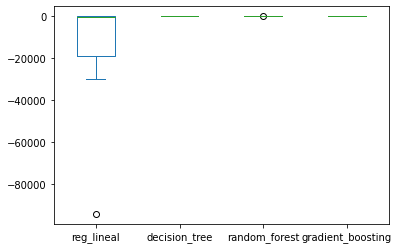

In [ ]:
mape_varsel.plot(kind='box')

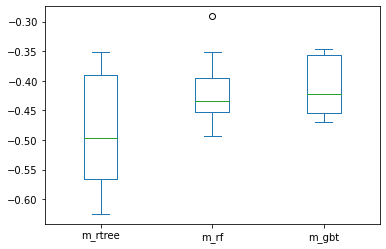

In [56]:
modelos2=list([m_rtree, m_rf, m_gbt])
def medir_modelos(modelos2,scoring,X,y,cv,cross_val_score,pd):

    metric_modelos=pd.DataFrame()
    for modelo in modelos2:
        scores=cross_val_score(modelo,X,y, scoring=scoring, cv=cv )
        pdscores=pd.DataFrame(scores)
        metric_modelos=pd.concat([metric_modelos,pdscores],axis=1)
    
    metric_modelos.columns=["m_rtree","m_rf","m_gbt"]
    return metric_modelos

score22 = medir_modelos(modelos2,"neg_mean_absolute_percentage_error",X2,y,10, cross_val_score, pd)

score22.columns=['m_rtree', 'm_rf', 'm_gbt']
score22.plot(kind='box')

#seleccionamos RandomForestRegressor

In [57]:
#Hiperparametros
param_grid = [{'n_estimators': [3, 500, 100], 'max_features': [5,20]},
{'bootstrap': [False,True]}]


tun_rf=RandomizedSearchCV(m_rf,param_distributions=param_grid,n_iter=8,scoring="neg_root_mean_squared_error")
tun_rf.fit(X2,y)

resultados=tun_rf.cv_results_
tun_rf.best_params_
pd_resultados=pd.DataFrame(resultados)
pd_resultados[["params","mean_test_score"]]

rf_final=tun_rf.best_estimator_ ### Guardar el modelo con hyperparameter tunning
m_lreg=m_lreg.fit(X2,y)


RandomForestRegressor(max_features=5, n_estimators=500)

In [58]:
pd_resultados[["params","mean_test_score"]]

,params,mean_test_score
0,"{'n_estimators': 3, 'max_features': 5}",-1.264504
1,"{'n_estimators': 500, 'max_features': 5}",-1.081394
2,"{'n_estimators': 100, 'max_features': 5}",-1.086907
3,"{'n_estimators': 3, 'max_features': 20}",-1.267503
4,"{'n_estimators': 500, 'max_features': 20}",-1.093549
5,"{'n_estimators': 100, 'max_features': 20}",-1.087282
6,{'bootstrap': False},-1.342228
7,{'bootstrap': True},-1.114366
